# Tarea OpenCV e Machine Learning

#### La tarea consiste en realizar sobre una serie de imágenes o vídeos las siguientes operaciones:

####    Utiliza K-means y Opencv y explica con ejemplos cómo puedes combinarlos en cuantificación de color, compresión,..
#### - Explora cómo poner un logo sobre una imagen o un vídeo, crea máscaras,...
#### - Es interesante que utilices imágenes o vídeos propios. Documenta claramente todo el proceso.

## Ralphy Núñez Mercado

### ⬇️ Imports 

In [66]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from sklearn.cluster import KMeans
import cv2

### Obtener imagen

In [67]:
image = imread('foto_ralphy.jpg')
image.shape #alto, ancho, número de canales de color

(4032, 3024, 3)

### Mostrar imagen

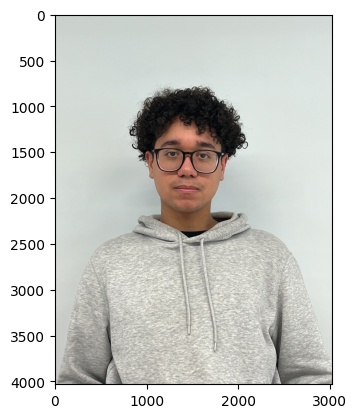

In [68]:
plt.imshow(image)

### Segmentación con OpenCV



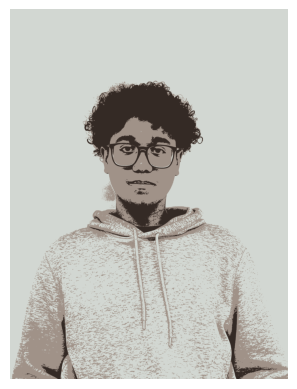

In [69]:
# Cargar imagen
image = cv2.imread("foto_ralphy.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a 2D 
pixel_vals = image.reshape((-1, 3))

# Convertir a float
pixel_vals = np.float32(pixel_vals)

# Aplicar KMeans con n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pixel_vals)

# Asignar los colores de los centros a los píxeles correspondientes
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

# Normalizar la imagen entre 0 y 1
imagen = segmented_image / 255.0

# Mostrar la imagen
plt.imshow(imagen)
plt.axis("off")
plt.show()


Con la segmentación de color podemos definir el número máximos de colores que tendra nuestra imagen mendiante los clusters, en esta caso hemos elegido 3 clsuters, además podemos segmentar mediante otras carácteristicas que no sean el color como:

Textura: Segmentación basada en la textura de las áreas de la imagen (por ejemplo, superficies rugosas frente a superficies lisas).

Forma: Segmentación basada en la forma de los objetos dentro de la imagen.

Intensidad o brillo: Segmentación basada en las diferencias en el nivel de brillo de los píxeles.

Características espaciales: Segmentación basada en la proximidad o relaciones espaciales entre píxeles.

Segmentación basada en bordes: Usar la detección de bordes para dividir la imagen en segmentos.

Segmentación basada en regiones: Utilizar agrupamientos de píxeles similares en cuanto a textura o características de intensidad.

### Probando la segmentacion con 15 clusters (colores)

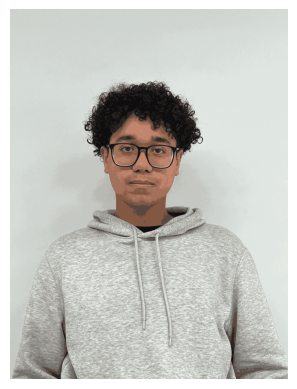

In [70]:
# Aplicar KMeans con n_clusters=15
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(pixel_vals)

# Asignar los colores de los centros a los píxeles correspondientes
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)

# Normalizar la imagen entre 0 y 1
imagen = segmented_image / 255.0

# Mostrar la imagen
plt.imshow(imagen)
plt.axis("off")
plt.show()

### Compresión con OpenCV

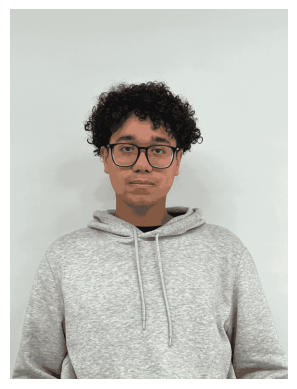

In [ ]:

# Cargar imagen
filename = 'foto_ralphy.jpg'
image = imread(filename)
rows, cols = image.shape[:2]

# Convertir la imagen a un arreglo 2D de píxeles
pixel_vals = image.reshape(-1, 3)

# Aplicar KMeans con n_clusters=4
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(pixel_vals)

# Obtener centros y etiquetas
centers = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
labels = np.asarray(kmeans.labels_, dtype=np.uint8).reshape(rows, cols)

# Reconstrucción de la imagen comprimida
imagen_comprimida = centers[labels]

salida = 'imagen_comprimida_kmeans.jpg'
cv2.imwrite(salida, cv2.cvtColor(imagen_comprimida, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 50])

# Mostrar la imagen
plt.imshow(imagen_comprimida)
plt.axis("off")
plt.show()

La compresion sirve para reducir el tamaño de una imagen, intentando no perder calidad

### Máscaras 

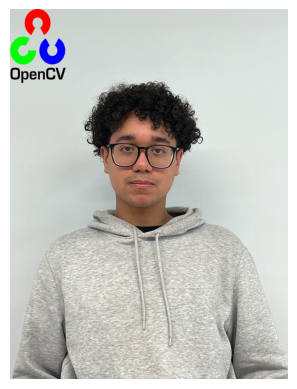

In [ ]:
imagen_fondo = cv2.imread('foto_ralphy.jpg')
imagen_superponer = cv2.imread('OpenCV_Logo.png', cv2.IMREAD_UNCHANGED)

# Definir el factor de escala (por ejemplo, 0.2 para hacerlo más pequeño)
factor_escala = 0.2

alto_superponer = int(imagen_fondo.shape[0] * factor_escala)
ancho_superponer = int(imagen_fondo.shape[1] * factor_escala)
imagen_superponer_redimensionada = cv2.resize(imagen_superponer, (ancho_superponer, alto_superponer))

mascara = imagen_superponer_redimensionada[:, :, 3]

# Crear una máscara inversa (para el fondo)
mascara_inversa = cv2.bitwise_not(mascara)

fondo = imagen_fondo.copy()

# Ubicar la imagen a superponer en la esquina (en este caso esquina superior izquierda)
x_offset = 0
y_offset = 0

# Extraer la parte de la imagen a superponer usando la máscara
superposicion = cv2.bitwise_and(imagen_superponer_redimensionada[:, :, :3], imagen_superponer_redimensionada[:, :, :3], mask=mascara)

# Colocar la imagen redimensionada en la esquina del fondo
for c in range(0, 3):
    fondo[y_offset:y_offset+alto_superponer, x_offset:x_offset+ancho_superponer, c] = \
        fondo[y_offset:y_offset+alto_superponer, x_offset:x_offset+ancho_superponer, c] * (1 - mascara / 255.0) + \
        superposicion[:, :, c] * (mascara / 255.0)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(fondo, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
